<a href="https://colab.research.google.com/github/shou67/AcousticClassification/blob/master/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import platform
print("python " + platform.python_version())

python 3.6.9


In [ ]:
cd /content/drive/My Drive/Colab Notebooks/DOC

/content/drive/My Drive/Colab Notebooks/DOC


In [ ]:
!ls

DOC.ipynb  input


In [ ]:
os.makedirs("input")

In [ ]:
cd input/

/content/drive/My Drive/Colab Notebooks/DOC/input


In [ ]:
!git clone https://github.com/karolpiczak/ESC-50.git

Cloning into 'ESC-50'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 4136 (delta 1), reused 0 (delta 0), pack-reused 4129
Receiving objects: 100% (4136/4136), 878.77 MiB | 17.29 MiB/s, done.
Resolving deltas: 100% (244/244), done.
Checking out files: 100% (2011/2011), done.


In [ ]:
#1 load-data and get wave-list

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import model_selection
from sklearn import preprocessing
import IPython.display as ipd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# define directories
base_dir = "./"
esc_dir = os.path.join(base_dir, "ESC-50")
meta_file = os.path.join(esc_dir, "meta/esc50.csv")
audio_dir = os.path.join(esc_dir, "audio/")

In [ ]:
# load metadata
meta_data = pd.read_csv(meta_file)

In [ ]:
# get data size
data_size = meta_data.shape
print(data_size)

(2000, 7)


In [ ]:
# arrange target label and its name
class_dict = {}
for i in range(data_size[0]):
    if meta_data.loc[i,"target"] not in class_dict.keys():
        class_dict[meta_data.loc[i,"target"]] = meta_data.loc[i,"category"]

In [ ]:
#2data load and write mel-spectrogram 

In [ ]:
# load a wave data
def load_wave_data(audio_dir, file_name):
    file_path = os.path.join(audio_dir, file_name)
    x, fs = librosa.load(file_path, sr=44100)
    return x,fs

In [ ]:
# display wave in plots
def show_wave(x):
    plt.plot(x)
    plt.show()

In [ ]:
# change wave data to stft
def calculate_sp(x, n_fft=512, hop_length=256):
    stft = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)
    sp = librosa.amplitude_to_db(np.abs(stft))
    return sp

In [ ]:
# display wave in spectrogram
def show_sp(sp, fs, hop_length):
    librosa.display.specshow(sp, sr=fs, x_axis="time", y_axis="log", hop_length=hop_length)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()

In [ ]:
# change wave data to mel-stft
def calculate_melsp(x, n_fft=1024, hop_length=128):
    stft = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))**2
    log_stft = librosa.power_to_db(stft)
    melsp = librosa.feature.melspectrogram(S=log_stft,n_mels=128)
    return melsp

In [ ]:
# display wave in heatmap
def show_melsp(melsp, fs):
    librosa.display.specshow(melsp, sr=fs, x_axis="time", y_axis="mel", hop_length=128)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.show()

wave size:(220500,)
melsp size:(128, 1723)
samping rate:44100


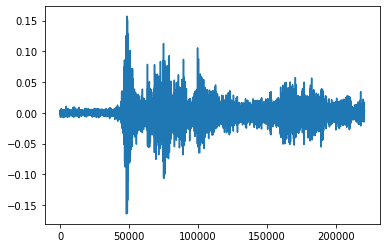

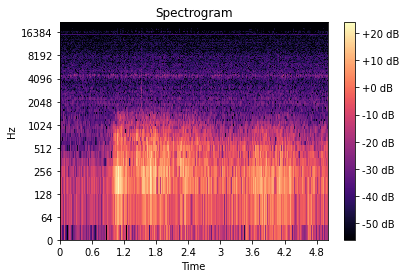

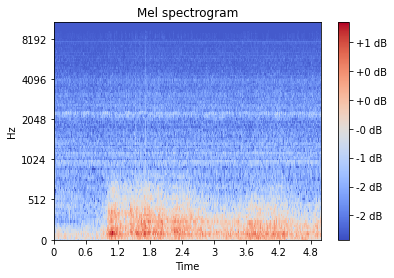

1-101296-B-19.wav


In [ ]:
# example data
x, fs = load_wave_data(audio_dir, meta_data.loc[5,"filename"]) #esc50.csvの上から５番目の音源
sp = calculate_sp(x)
melsp = calculate_melsp(x)

print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x.shape, melsp.shape, fs))
show_wave(x)
show_sp(sp, fs, hop_length=256)
show_melsp(melsp, fs)
print(meta_data.loc[5,"filename"])

In [ ]:
#paly sound
import IPython.display as ipd
ipd.Audio(x, rate=fs)

In [ ]:
#3Argumentation

In [ ]:
# data augmentation: add white noise
def add_white_noise(x, rate=0.002):
    return x + rate*np.random.randn(len(x))

In [ ]:
# data augmentation: shift sound in timeframe
def shift_sound(x, rate=2):
    return np.roll(x, int(len(x)//rate))

In [ ]:
# data augmentation: stretch sound
def stretch_sound(x, rate=1.1):
    input_length = len(x)
    x = librosa.effects.time_stretch(x, rate)
    if len(x)>input_length:
        return x[:input_length]
    else:
        return np.pad(x, (0, max(0, input_length - len(x))), "constant")

In [ ]:
#4 get mel-spectrogram 

In [ ]:
import librosa
import librosa.display

In [ ]:
# change wave data to mel-stft
def calculate_melsp(x, n_fft=1024, hop_length=128):
    stft = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))**2
    log_stft = librosa.power_to_db(stft)
    melsp = librosa.feature.melspectrogram(S=log_stft,n_mels=128)
    return melsp

In [ ]:
#preparing data

In [ ]:
# get training dataset and target dataset
x = list(meta_data.loc[:,"filename"])
y = list(meta_data.loc[:, "target"])
print(x)
print(y)

['1-100032-A-0.wav', '1-100038-A-14.wav', '1-100210-A-36.wav', '1-100210-B-36.wav', '1-101296-A-19.wav', '1-101296-B-19.wav', '1-101336-A-30.wav', '1-101404-A-34.wav', '1-103298-A-9.wav', '1-103995-A-30.wav', '1-103999-A-30.wav', '1-104089-A-22.wav', '1-104089-B-22.wav', '1-105224-A-22.wav', '1-110389-A-0.wav', '1-110537-A-22.wav', '1-115521-A-19.wav', '1-115545-A-48.wav', '1-115545-B-48.wav', '1-115545-C-48.wav', '1-115546-A-48.wav', '1-115920-A-22.wav', '1-115920-B-22.wav', '1-115921-A-22.wav', '1-116765-A-41.wav', '1-11687-A-47.wav', '1-118206-A-31.wav', '1-118559-A-17.wav', '1-119125-A-45.wav', '1-121951-A-8.wav', '1-12653-A-15.wav', '1-12654-A-15.wav', '1-12654-B-15.wav', '1-13571-A-46.wav', '1-13572-A-46.wav', '1-13613-A-37.wav', '1-137-A-32.wav', '1-137296-A-16.wav', '1-14262-A-37.wav', '1-155858-A-25.wav', '1-155858-B-25.wav', '1-155858-C-25.wav', '1-155858-D-25.wav', '1-155858-E-25.wav', '1-155858-F-25.wav', '1-15689-A-4.wav', '1-15689-B-4.wav', '1-160563-A-48.wav', '1-160563-

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.25, stratify=y)
print("x train:{0}\ny train:{1}\nx test:{2}\ny test:{3}".format(len(x_train),
                                                                len(y_train), 
                                                                len(x_test), 
                                                                len(y_test)))

# output
# x train:1500
# y train:1500
# x test:500
# y test:500


x train:1500
y train:1500
x test:500
y test:500


In [ ]:
# showing the classes are equally splitted
a = np.zeros(50)
for c in y_test:
    a[c] += 1
print(a)

# output
# [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
#  10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
#  10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]


[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]


In [ ]:
freq = 128
time = 1723

In [ ]:
# save wave data in npz, with augmentation
def save_np_data(filename, x, y, aug=None, rates=None):
    np_data = np.zeros(freq*time*len(x)).reshape(len(x), freq, time)
    np_targets = np.zeros(len(y))
    for i in range(len(y)):
        _x, fs = load_wave_data(audio_dir, x[i])
        if aug is not None:
            _x = aug(x=_x, rate=rates[i])
        _x = calculate_melsp(_x)
        np_data[i] = _x
        np_targets[i] = y[i]
    np.savez(filename, x=np_data, y=np_targets) 

In [ ]:
# save test dataset
if not os.path.exists("esc_melsp_test.npz"):
    save_np_data("esc_melsp_test.npz", x_test,  y_test)

In [ ]:
# save raw training dataset
if not os.path.exists("esc_melsp_train_raw.npz"):
    save_np_data("esc_melsp_train_raw.npz", x_train,  y_train)

In [ ]:
# save training dataset with white noise
if not os.path.exists("esc_melsp_train_wn.npz"):
    rates = np.random.randint(1,50,len(x_train))/10000
    save_np_data("esc_melsp_train_wn.npz", x_train,  y_train, aug=add_white_noise, rates=rates)

In [ ]:
# save training dataset with sound shift
if not os.path.exists("esc_melsp_train_ss.npz"):
    rates = np.random.choice(np.arange(2,6),len(y_train))
    save_np_data("esc_melsp_train_ss.npz", x_train,  y_train, aug=shift_sound, rates=rates)

In [ ]:
# save training dataset with stretch
if not os.path.exists("esc_melsp_train_st.npz"):
    rates = np.random.choice(np.arange(80,120),len(y_train))/100
    save_np_data("esc_melsp_train_st.npz", x_train,  y_train, aug=stretch_sound, rates=rates)

In [ ]:
# save training dataset with combination of white noise and shift or stretch
if not os.path.exists("esc_melsp_train_com.npz"):
    np_data = np.zeros(freq*time*len(x_train)).reshape(len(x_train), freq, time)
    np_targets = np.zeros(len(y_train))
    for i in range(len(y_train)):
        x, fs = load_wave_data(audio_dir, x_train[i])
        x = add_white_noise(x=x, rate=np.random.randint(1,50)/1000)
        if np.random.choice((True,False)):
            x = shift_sound(x=x, rate=np.random.choice(np.arange(2,6)))
        else:
            x = stretch_sound(x=x, rate=np.random.choice(np.arange(80,120))/100)
        x = calculate_melsp(x)
        np_data[i] = x
        np_targets[i] = y_train[i]
    np.savez("esc_melsp_train_com.npz", x=np_data, y=np_targets)

In [ ]:
#for preparing CNN

In [ ]:
!pip install keras==2.1.2

     |████████████████████████████████| 307kB 7.4MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.1.2 which is incompatible.
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [ ]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 50kB/s 
     |████████████████████████████████| 512kB 16.4MB/s 
     |████████████████████████████████| 3.8MB 52.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=b8acc54224f3906742edc28700cfdd004b46f3e35cd1c0fdfbc4dd2a668ea66a
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: 

In [ ]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.1.2


In [ ]:
import tensorflow
print(tensorflow.__version__)

1.15.0


In [ ]:
!ls

ESC-50			 esc_melsp_train_raw.npz  esc_melsp_train_wn.npz
esc_melsp_test.npz	 esc_melsp_train_ss.npz
esc_melsp_train_com.npz  esc_melsp_train_st.npz


In [ ]:
#CNN

In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K

In [ ]:
import keras
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Activation
from keras.layers import Conv2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization, Add
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from tensorflow.contrib.tpu.python.tpu import keras_support


In [ ]:
# redefine target data into one hot vector
classes = 50
Y_train = to_categorical(y_train, classes)
Y_test = to_categorical(y_test, classes)

In [ ]:
def cba(inputs, filters, kernel_size, strides):
    x = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

In [ ]:
# define CNN
inputs = Input(shape=(x_train.shape[1:]))

AttributeError: ignored

In [ ]:
x_1 = cba(inputs, filters=32, kernel_size=(1,8), strides=(1,2))
x_1 = cba(x_1, filters=32, kernel_size=(8,1), strides=(2,1))
x_1 = cba(x_1, filters=64, kernel_size=(1,8), strides=(1,2))
x_1 = cba(x_1, filters=64, kernel_size=(8,1), strides=(2,1))

NameError: ignored

In [ ]:
x_2 = cba(inputs, filters=32, kernel_size=(1,16), strides=(1,2))
x_2 = cba(x_2, filters=32, kernel_size=(16,1), strides=(2,1))
x_2 = cba(x_2, filters=64, kernel_size=(1,16), strides=(1,2))
x_2 = cba(x_2, filters=64, kernel_size=(16,1), strides=(2,1))

In [ ]:
x_3 = cba(inputs, filters=32, kernel_size=(1,32), strides=(1,2))
x_3 = cba(x_3, filters=32, kernel_size=(32,1), strides=(2,1))
x_3 = cba(x_3, filters=64, kernel_size=(1,32), strides=(1,2))
x_3 = cba(x_3, filters=64, kernel_size=(32,1), strides=(2,1))

In [ ]:
x_4 = cba(inputs, filters=32, kernel_size=(1,64), strides=(1,2))
x_4 = cba(x_4, filters=32, kernel_size=(64,1), strides=(2,1))
x_4 = cba(x_4, filters=64, kernel_size=(1,64), strides=(1,2))
x_4 = cba(x_4, filters=64, kernel_size=(64,1), strides=(2,1))

In [ ]:
x = Add()([x_1, x_2, x_3, x_4])

In [ ]:
x = cba(x, filters=128, kernel_size=(1,16), strides=(1,2))
x = cba(x, filters=128, kernel_size=(16,1), strides=(2,1))

In [ ]:
x = GlobalAveragePooling2D()(x)
x = Dense(classes)(x)
x = Activation("softmax")(x)

In [ ]:
model = Model(inputs, x)

In [ ]:
# initiate Adam optimizer
opt = keras.optimizers.adam(lr=0.00001, decay=1e-6, amsgrad=True)

In [ ]:
# Let's train the model using Adam with amsgrad
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
model.summary()